# Zad 1

In [3]:
import urllib.request
import os
import shutil
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as figure

from sklearn.datasets import fetch_openml
import random
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, Binarizer
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
from itertools import islice
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics

from imgaug import augmenters as iaa

Dane będziemy pobierać z api openml: https://www.openml.org/search?type=data. Używamy do tego polecenia fetch_openml, argumentem jest interesujący nas zbiór danych.

## MNIST
http://yann.lecun.com/exdb/mnist/

MNIST (Modified National Institute of Standards and Technology database) - duży zbiór ręcznie zapisanych cyfr.  Posiada 60'000 obrazów treningowych i 10'000 testowych. Jest bardzo dobrym zbiorem danych, dla tych którzy chcą zapoznać się z technikami rozpoznawania obrazów, przy minimalnych wysiłkach włożonych w preprocessing. 

In [4]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)

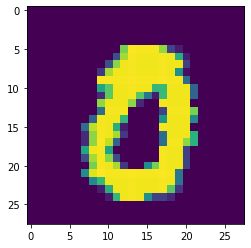

In [13]:
plt.imshow(np.array(mnist.data[69]).reshape(28,28))

Plik zawiera kolor każdego piksela z obrazka

In [21]:
print(mnist.data[69])
print(mnist.target[69])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 203. 254.
 252. 252. 252. 214.  51.  20.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  62. 221. 252.
 250. 250. 250. 252. 250. 160.  20.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [ ]:
Poprawne rozpoznanie jako 0.

## FMNIST

Fashion-MNIST

Zbiór zawiera obrazy przedstawiające elementy ubioru. MNIST uznawany jest za zbyt prostym benchmarkiem algorytmów rozpoznawania obrazu, natomiast FMNIST lepiej oddaje współczesne problemy tego zagadnienia. Wskazywany więc jest jako następca MNIST.


https://github.com/zalandoresearch/fashion-mnist

In [5]:
fmnist = fetch_openml("Fashion-MNIST", data_home="./fmnist", cache=True)

Category: 1


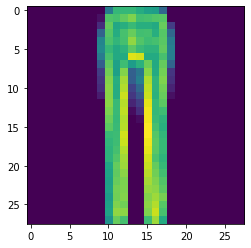

In [16]:
plt.imshow(np.array(fmnist.data[69]).reshape(28,28))
print('Category:', fmnist.target[69])

In [17]:
print(fmnist.DESCR)

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

Widzimy, że zdjęcie zaklasyfikowano poprawnie.

## CIFAR-10

Zbiór kolorowych obrazków, podzielonych na 10 klas. 

In [44]:
cifar10 = fetch_openml("CIFAR_10", data_home="./cifar", cache=True)

KeyboardInterrupt: 

In [ ]:
single_img_reshaped = np.transpose(np.array(cifar10.data[69]).reshape(3,32,32).astype(int) , (1,2,0))
plt.imshow(single_img_reshaped)

print(cifar10.DESCR)
print(cifar10.target[69])

Poraz kolejny dobrze sklasyfikowany obraz - jako truck.

## SmallNorb
Umożliwia rozpoznawanie obrazków 3D. Ze względu na jego ogromny rozmiar, poniżej tylko screenshot: 

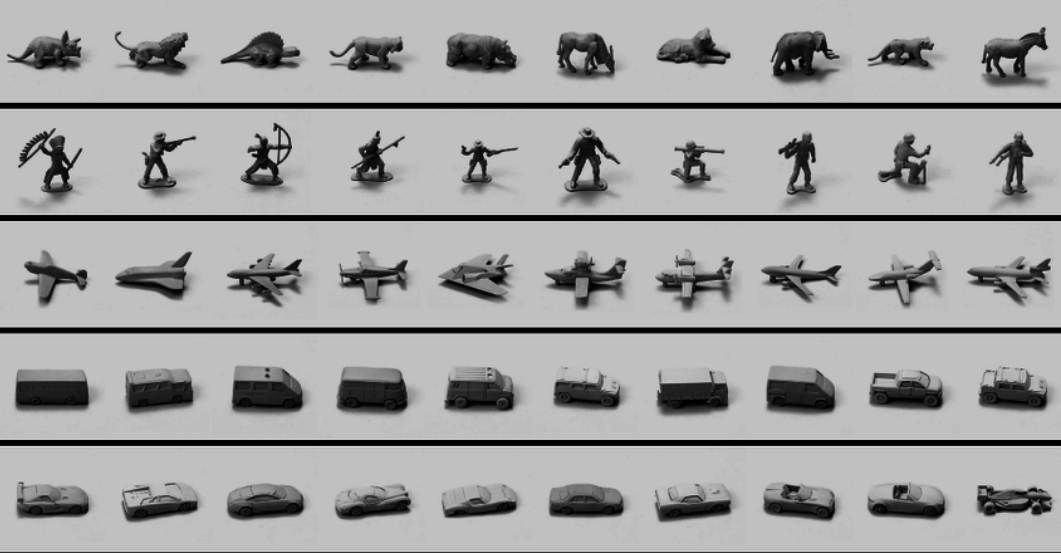

## TNG
The Next Generation. Zbiór danych zawierający opisy scen z filmu Star Trek.

https://github.com/RMHogervorst/TNG

# Zad 2

## Selekcja 
Wybieramy n początkowych elementów ze zbioru danych: 


In [69]:
fmnist_reduced_list = list(fmnist.data)[:50]
print(fmnist_reduced_list)

[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
        13.,  73.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,   0.,   1.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   3.,   0.,  36., 136., 127.,  62.,  54.,   0.,
         0.,   0.,   1.,   3.,   4.,   0.,   0.,   3.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  

Podział przy pomocy biblioteki sklearn na zbiór treningowy i testowy: 

In [70]:
x = fmnist.data

x_train, x_test = train_test_split(x, test_size=0.2)
print('X_train: ', len(x_train))
print('X_test: ', len(x_test))

X_train:  56000
X_test:  14000


## Normalizacja


### Skalowanie
https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range


In [71]:
minmax = MinMaxScaler(feature_range=(0,1))
minmax_df = minmax.fit_transform(x_train)
df_scaled = pd.DataFrame(minmax_df)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.004348,0.0,0.000000,0.180328,0.337255,...,0.015686,0.000000,0.003922,0.658824,0.733333,0.364706,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.004405,0.000000,0.0,0.067873,0.008197,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.430328,0.788235,...,0.701961,0.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.004098,0.003922,...,0.329412,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.517647,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
55996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.172549,...,0.396078,0.286275,0.231373,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
55997,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
55998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.415686,0.525490,0.415686,0.392157,0.321569,0.0


## Standaryzacja
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

Polega na przeskalowaniu każdej klasy przy pomocy wartości średniej i odchylenia standardowego danej klasy:



Oczekujemy, że: $ \mu_{X'} = 0 $

a odchylenie standardowe: $ \sigma_{X'} = 1 $

In [75]:
standscaler = StandardScaler()
standscaler_df = standscaler.fit_transform(x_train)
st_df = pd.DataFrame(standscaler_df)
st_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,0.099381,-0.098423,-0.157141,1.611988,1.883150,...,-0.530325,-0.475633,-0.371329,3.423433,3.165886,1.655127,-0.289642,-0.159647,-0.091244,-0.035371
1,-0.009196,-0.021285,-0.027922,-0.040887,0.175969,-0.070284,-0.098423,0.901278,-0.154038,-0.376347,...,-0.599963,-0.475633,-0.395046,-0.405903,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
2,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,4.176930,4.904571,...,2.516362,-0.475633,-0.395046,-0.337522,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
3,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,-0.238134,-0.376347,...,-0.599963,-0.475633,-0.395046,-0.405903,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
4,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,-0.196086,-0.350074,...,0.862446,0.136616,-0.395046,-0.405903,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,-0.238134,-0.376347,...,1.698109,-0.271550,-0.395046,-0.405903,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
55996,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,-0.238134,0.779675,...,1.158410,1.014173,1.004271,-0.314728,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
55997,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,-0.238134,-0.376347,...,-0.599963,-0.414408,-0.395046,-0.405903,-0.441440,-0.397548,-0.289642,-0.159647,-0.091244,-0.035371
55998,-0.009196,-0.021285,-0.027922,-0.040887,-0.056071,-0.070284,-0.098423,-0.157141,-0.238134,-0.376347,...,-0.599963,-0.475633,-0.371329,-0.405903,1.603354,2.560069,3.289068,5.528031,8.611156,-0.035371


In [76]:
st_df.mean(axis=0)  # should be [0., 0.]


0     -2.501049e-15
1     -3.016950e-15
2      2.691833e-15
3      2.032196e-16
4     -9.633519e-16
           ...     
779   -1.335265e-15
780    1.802310e-15
781   -8.071430e-16
782   -4.302506e-16
783   -5.862443e-16
Length: 784, dtype: float64

In [77]:
st_df.std(axis=0)  # should be [1., 1.]


0      1.000009
1      1.000009
2      1.000009
3      1.000009
4      1.000009
         ...   
779    1.000009
780    1.000009
781    1.000009
782    1.000009
783    1.000009
Length: 784, dtype: float64

Z dokładnością do precyzji arytmetyki wszystko się zgadza.

### Normalizacja
Sprowadzenie każdego wektora do długości 1 w normie L1 lub L2.

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization

In [79]:
norm = Normalizer(norm='l1') # l1 could be changed to l2
norm_df = norm.fit_transform(x_train)
norm_df = pd.DataFrame(norm_df)
norm_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.000009,0.0,0.00000,0.000417,0.000814,...,0.000038,0.000000,0.000009,0.001590,0.001770,0.000880,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000009,0.000000,0.0,0.00013,0.000017,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.001664,0.003186,...,0.002837,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000015,0.000015,...,0.001254,0.000448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.002730,0.000207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
55996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000672,...,0.001543,0.001115,0.000902,0.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
55997,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
55998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000012,0.000000,0.001324,0.001674,0.001324,0.001249,0.001024,0.0


# Zad 3

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Algorytm kNN (k najbliższych sąsiadów) oblicza dystans każdy-do-każdego takich punktów pomiarowych w przestrzeni euklidesowej, po czym wybiera k najbliższych obiektów do rozważanego. Te k najbliższych sąsiadów uznaje się, że są najbardziej zbliżone cechami. Dla każdego punktu w przestrzeni bierzemy k najbliższych sąsiadów i przypisujemy go do klasy z etykietą, którą ma większość z tych k najbliższych punktów danych (tzw. majority voting). Jako klasyfikator używa się tylko najbliższego sąsiada, natomiast liczbę k dobiera się tak, aby była ona:
- wystarczająco duża by zminimalizować prawdopodobieństwo złego zaklasyfikowania x.
- wystarczająco mała (w stosunku do ilości próbek) tak, by punkty wystarczająco bliskie do x dawały dokładne przybliżenie prawdziwej klasy x.

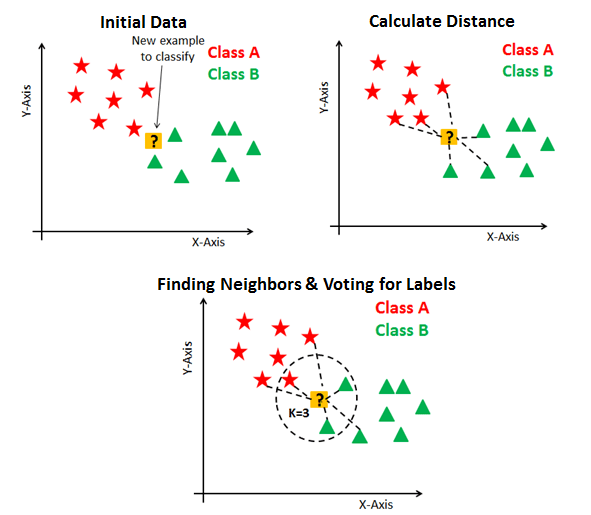

In [131]:
wine = datasets.load_wine()
print(wine.feature_names)
print(wine.target_names)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3) # 70% training and 30% test


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


Dokonujemy przewidywania gatunku wina

In [132]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [133]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7222222222222222


### FAISS
Biblioteka wykorzystująca CUDA, znacznie przyśpiesza obliczenia dzięki użyciu GPU.

https://github.com/facebookresearch/faiss

# Zad 4

Walidacja krzyżowa to metoda statystyczna, polegająca na podziale próby statystycznej na podzbiory, a następnie przeprowadzaniu wszelkich analiz na niektórych z nich (zbiór uczący), podczas gdy pozostałe służą do potwierdzenia wiarygodności jej wyników (zbiór testowy).
https://scikit-learn.org/stable/modules/cross_validation.html

### Wybrane strategie walidacji krzyżowej


- leave-one-out:
Jest to odmiana walidacji K-krotnej, gdy N-elementowa próba jest dzielona na N podzbiorów, zawierających po jednym elemencie. Stosowana często dla małych zbiorów danych.

- holdout: 
Losowo wrzucamy punkty do zbioru treningowego i testowego, jedyny warunek jest taki, żeby zbiór testowy był mniejszy. W przeciwieństwie do k-krotnej walidacji krzyżowej nie uśredniamy wyników, tylko przebiegamy przez zbiór raz - co powoduje, że rezultaty mogą być bardzo nietrafione. 

- k-krotna cross-walidacja:
Polega na podzieleniu danych na zbiór cross-walidacyjny i testowy, np. w proporcji 80:20. Następnie, zbiór cross-walidacyjny dzieli się na k części. Jedną z nich traktuje się jako zbiór walidacyjny, a pozostałe łącznie - jako treningowy. Na tych danych trenuje się i waliduje model z ustalonymi hiperparametrami. Ta procedura jest wykonywana k-krotnie, za każdym razem wybieramy inną część jako zbiór walidacyjny.
Po uśrednieniu k wyników, mamy możliwość dobrać takie hiperparametry dla przypadku ogólnego, dla których uzyskana średnia była najlepsza.

# Zagadnienie 5 - Badanie wpływu parametrów modelu na miary jakości klasyfikatora

Pokażemy zmiany miar jakości klasyfikatora gdy zmienia się 
* rozmiar zbioru treningowego
* ilość sprawdzanych sąsiadów
* kernel
* promień

In [1]:
def check_accuracy_with_increasing_training_size(X, y):
    X, y = X[:7000], y[:7000] # Bierzemy część MNIST dla szybszych obliczeń
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    return {part: check_accuracy(X_train, y_train, X_test, y_test, part) for part in [0.1, 0.3, 0.5, 0.7]}


def check_accuracy_with_varying_neighbor_count(X, y):
    X, y = X[:7000], y[:7000]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    return {k: check_accuracy(X_train, y_train, X_test, y_test, k=k) for k in [2, 3, 5, 7, 10, 15]}


def check_accuracy_by_kernel(X, y):
    X, y = X[:7000], y[:7000]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    return {kernel: check_accuracy(X_train, y_train, X_test, y_test, kernel=kernel) for kernel in ['uniform', 'distance']}
    

def check_accuracy(X_train, y_train, X_test, y_test, part=0.5, k=5, kernel='uniform'):
    new_size = int(len(X_train) * part)
    X_train, y_train = resample(X_train, y_train, n_samples=new_size, replace=False, random_state=5)

    model = KNeighborsClassifier(n_neighbors=k, algorithm='auto', weights=kernel)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return accuracy_score(y_true=y_test, y_pred=y_pred)

In [12]:
check_accuracy_with_increasing_training_size(mnist.data, mnist.target)

{0.2: 0.8952380952380953, 0.5: 0.920952380952381, 0.8: 0.9338095238095238}

In [22]:
check_accuracy_with_varying_neighbor_count(mnist.data, mnist.target)

{2: 0.9171428571428571,
 3: 0.9266666666666666,
 5: 0.920952380952381,
 7: 0.9185714285714286,
 10: 0.9185714285714286,
 15: 0.9052380952380953}

In [5]:
check_accuracy_by_kernel(mnist.data, mnist.target)

{'uniform': 0.920952380952381, 'distance': 0.9242857142857143}

Użyjemy klasyfikatora `RadiusNeighborsClassifier` żeby sprawdzić zależność od promienia poszukiwań

In [9]:
def accuracy_with_varying_radius(X, y):
    X, y = X[:7000], y[:7000]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    return {radius: accuracy_by_radius(X_train, y_train, X_test, y_test, radius) for radius in [0.2, 0.5, 0.8, 1., 2.]}


def accuracy_by_radius(X_train, y_train, X_test, y_test, radius):
    print(radius)
    model = RadiusNeighborsClassifier(radius, weights='uniform', outlier_label='most_frequent')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    return accuracy_score(y_true=y_test, y_pred=y_pred)

In [10]:
accuracy_with_varying_radius(mnist.data, mnist.target)

0.2
0.5
0.8
1.0
2.0


{0.2: 0.10571428571428572,
 0.5: 0.10571428571428572,
 0.8: 0.10571428571428572,
 1.0: 0.10571428571428572,
 2.0: 0.10571428571428572}

# Zagadnienie 6 - Augumentacja

Augumentacja jest techniką pozyskiwania dodatkowych danych do trenowania modelu na podstawie już istniejących danych poprzez aproksymację, inter- i ekstrapolację, przekształcenie itp. Potrafi znacznie poprawić dokładność modelu w sytuacji, gdy zbiór danych nie jest wystarczająco duży.

Dla przykładu prosta augumentacja obrazu może polegać na dodaniu do zbioru treningowego dodatkowych kopii tego obrazu uzyskiwanych przez przekształcenia takie jak: obrót, przybliżenie/oddalenie, przycięcie, dodanie szumu.

### Prosty przykład procedury przekształcającej obraz

In [25]:
# Procedura obracająca obraz wzdłóż poziomej osi symetrii (obraz przechowywany jako dwuwymiarowa tablica numpy)
import numpy as np
def flip(image):
    height, width = image.shape
    flipped_image = np.ndarray(shape=(height, width), dtype=int)
    for row in range(height):
        flipped_image[row] = image[height - row - 1]
    return flipped_image

In [26]:
image = np.array([[1,2,3,4,3,2],
                  [5,6,7,8,7,6],
                  [9,10,11,12,11,10],
                  [13,14,15,16,15,14]])

print("Oryginalny obraz")
print(image)
print("Odwrócony obraz")
print(flip(image))

Oryginalny obraz
[[ 1  2  3  4  3  2]
 [ 5  6  7  8  7  6]
 [ 9 10 11 12 11 10]
 [13 14 15 16 15 14]]
Odwrócony obraz
[[13 14 15 16 15 14]
 [ 9 10 11 12 11 10]
 [ 5  6  7  8  7  6]
 [ 1  2  3  4  3  2]]


Można by stwierdzić, że nikt nie będzie próbował dokonywać klasyfikowacji odwróconego zdjęcia, np. człowieka.<br>
Jednak czy aby na pewno jest ono zupełnie nieprzydatne do celu zwiększenia dokładności modelu?

![title](stanie-na-rekach.jpg)

### Jak bardzo augumentacja poprawia model?

Spróbujemy skorzystać z niewielkiego zbioru danych, dodać augumentację i sprawdzić czy dokładność modelu poprawiła się.

In [27]:
import imgaug.augmenters as iaa
# Czy rzecz tak prosta jak dodanie kilku losowych czarno-białych pikseli może pomóc zwiększyć dokładność?
def augument(images):
    aug = iaa.Sequential([
        iaa.SaltAndPepper(0.1)
    ])
    return aug(images=images)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Użyjemy tylko 700 z 70000 obrazków w MNIST
mnist_small, mnist_small_target = mnist.data[:700], mnist.target[:700]
X_train, X_test, y_train, y_test = train_test_split(mnist_small, mnist_small_target, train_size=0.75, random_state=0)
X_train_aug, y_train_aug = np.reshape(np.copy(X_train), (-1, 28, 28)), np.concatenate([y_train, y_train])

# Dla każdego obrazka z X_train dokładamy nowy, zaugumentowany
for aug_img in augument([np.reshape(x, (28,28,1)) for x in np.array(X_train, dtype='uint8')]):
    X_train_aug = np.append(X_train_aug, np.reshape(aug_img, (1,28,28)), axis=0)

X_train_aug = np.reshape(X_train_aug, (-1, 784))

knn = KNeighborsClassifier(algorithm='auto', n_neighbors=3)

In [33]:
# Sprawdzenie dokładności bez augumentacji
knn.fit(X_train, y_train)
y_pred_best = knn.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred_best)

0.8285714285714286

In [34]:
# Sprawdzenie dokładności po augumentacji
knn.fit(X_train_aug, y_train_aug)
y_pred_best = knn.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred_best)

0.8342857142857143

Dodanie do modelu nowych obrazów z szumem "salt and pepper" pomogło poprawić model<br>
Widzimy że nawet bardzo prosta augumentacja potrafi zwiększyć dokładność modelu

# Zad 7

# Zad 8